# Compare the analytical solution and the neural net mask

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")
import os
from utils.model import Net_mask
from utils.data import Data
from scripts.parameters import get_parameters, get_parameters_1
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps, tensor_Q_m, sigma2_eps, tau2 = get_parameters()
tensor_mu_m2, tensor_Sigma_m2, tensor_mu_eps2, tensor_Sigma_eps2, tensor_Q_m2, sigma2_eps2, tau22 = get_parameters_1()
data_generator = Data(tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps)
data_generator2 = Data(tensor_mu_m2, tensor_Sigma_m2, tensor_mu_eps2, tensor_Sigma_eps2)

In [4]:
tensor_raw = data_generator.get_tensor_data(1, [2.5, -1, 2.5], [0, 2, 9])

tensor([ 0.0132, -0.0778, -0.0930, -0.3629,  0.7952, -0.1987, -0.0024, -0.0216,
        -0.0363, -0.0286], grad_fn=<SliceBackward0>)
tensor([ 0.0091, -0.0662, -0.1286,  0.0800, -0.0594,  0.1027,  0.0093, -0.0008,
        -0.0976,  0.1246], grad_fn=<SliceBackward0>)
tensor([ 0.0171,  0.0196,  0.0512,  0.0513,  0.7758,  0.0618, -0.0263, -0.7201,
        -0.0718, -0.0423], grad_fn=<SliceBackward0>)
tensor([-2.7522e-01,  8.7599e-03,  8.7671e-03, -2.7909e-03, -2.9168e-03,
         8.1086e-04,  1.1081e-02, -3.4106e-02, -2.1471e-01,  1.0012e+00],
       grad_fn=<SliceBackward0>)
tensor([ 0.0459,  0.0456,  0.0215,  0.0088, -0.0403, -0.1765,  1.1043, -0.2062,
        -0.0539, -0.0038], grad_fn=<SliceBackward0>)
tensor([-0.1491,  0.5222, -0.2686,  0.0514,  0.0879,  0.5065,  0.0586,  0.0725,
         0.5652,  0.0009], grad_fn=<SliceBackward0>)
tensor([ 0.0915,  0.2535, -0.0588, -0.3043, -0.1375,  0.1744,  0.2633, -0.1170,
        -0.1010, -0.3141], grad_fn=<SliceBackward0>)
tensor([ 0.0065,  0.24

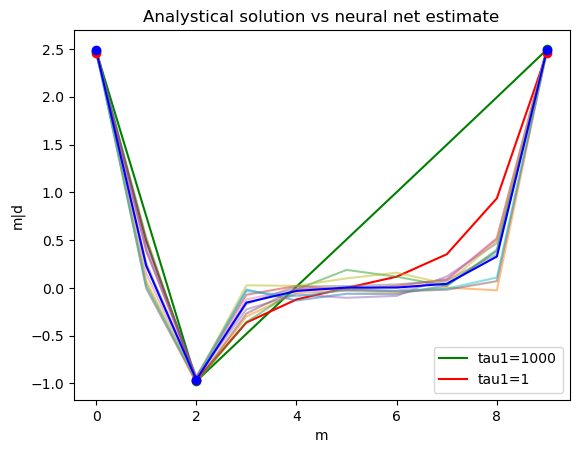

In [10]:
# Getting tensor
n_param = 10
input_tensor = tensor_raw[0]
d = input_tensor[:10]
mask = input_tensor[10:]
location_raw = torch.where(mask > 0.5)
location = location_raw[0]
post_mean, _ = data_generator.get_tensor_posterior(input_tensor)
post_mean2, _ = data_generator2.get_tensor_posterior(input_tensor)

# Plotting model estimates
outer_dir = 'map_vs_bnn_maps'
rootdir = "../saved_models/" + str(outer_dir)
model = Net_mask()
names = []
for subdir, dirs, files in os.walk(rootdir):
    folders = dirs
    count = len(folders)
    break

plt.plot(range(10), post_mean, 'g')
plt.plot(range(10), post_mean2, 'r')
sum_tensor_maps = torch.zeros(n_param)
for f in folders: 
    name = '../saved_models/' + str(outer_dir) + '/' + str(f) + '/' + 'model_weights.pth'
    model.load_state_dict(torch.load(name))
    model.eval()
    print(list(model.parameters())[0][0][:10])
    out_raw = model(tensor_raw)
    out = out_raw[0].detach()
    #print(out.size())
    #print(out)
    sum_tensor_maps += out
    #plt.plot(range(10), post_mean)
    #plt.plot(range(10), out)
    #out = out + torch.randn(10)*0.01

    #if f == '0':
    #    plt.plot(range(10), out, 'g')#, 'o')
    #    plt.plot(location, out[location_raw], 'go')
    #else:
    #    plt.plot(range(10), out, '--', alpha=0.5)#, 'o')
    plt.plot(range(10), out, alpha=0.5)#, 'o')

    #plt.plot(location, out[location_raw], 'o')
    #names.append(str(f))
    #print(out)
plt.plot(range(10), sum_tensor_maps/count, 'b')
plt.title("Analystical solution vs neural net estimate")
plt.xlabel("m")
plt.ylabel("m|d")
#plt.legend(['tau1=1000', 'tau1=1', 'default', 'map', 'positive', 'negative', 'average'])
plt.legend(['tau1=1000', 'tau1=1'])
plt.plot(location, post_mean[location_raw], 'go')
plt.plot(location, post_mean2[location_raw], 'ro')
plt.plot(location, (sum_tensor_maps/count)[location_raw], 'bo')
#names.append("Analytical tau2=1000")
#names.append("Analytical tau=1")
#names.append("MAP mean")
#plt.legend(names)
#plt.legend()
plt.savefig('../figures/bnn_comp.pdf')

tensor([ 1.0527e+00, -2.2848e-01, -3.5230e-02, -1.0881e-02,  3.6519e-04,
         1.4610e-02,  3.4847e-03,  4.1823e-03, -1.9514e-03, -2.2042e-01],
       grad_fn=<SliceBackward0>)
tensor([-0.2726, -0.1748,  0.3033,  0.0748, -0.3112,  0.0117,  0.3802, -0.1835,
        -0.2312, -0.0032], grad_fn=<SliceBackward0>)
tensor([ 0.2333,  0.1267, -0.0475,  0.1766, -0.0159, -0.2026, -0.0213,  0.1020,
         0.0616,  0.0649], grad_fn=<SliceBackward0>)
tensor([ 0.3173,  0.0207,  0.0068, -0.0084,  0.0137,  0.0088,  0.0223,  0.0204,
         0.3088, -0.9546], grad_fn=<SliceBackward0>)
tensor([-0.2026, -0.1709, -0.1211, -0.1263,  0.5281, -0.5678,  0.0430, -0.5049,
        -0.2400, -0.2239], grad_fn=<SliceBackward0>)
tensor([-2.7864e-01, -4.0350e-04, -1.0016e-01, -2.3078e-01,  9.9616e-01,
        -6.2401e-02, -7.9611e-02,  1.7202e-01,  6.8445e-02, -1.7274e-02],
       grad_fn=<SliceBackward0>)
tensor([ 0.1287, -0.2661,  0.0716, -0.0241, -0.0916, -0.0856,  0.6008, -0.2121,
        -0.0640, -0.0668], g

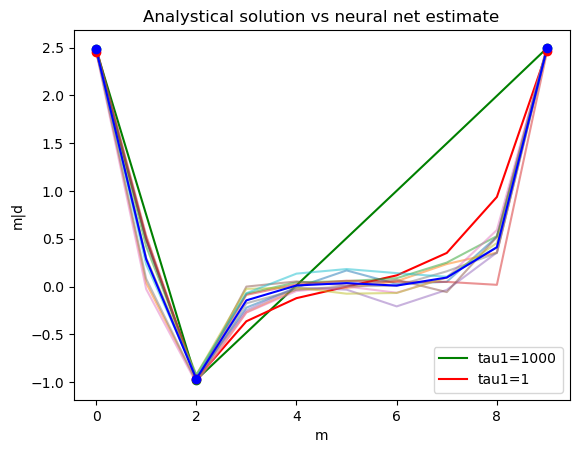

In [6]:

# Getting tensor
n_param = 10
input_tensor = tensor_raw[0]
d = input_tensor[:10]
mask = input_tensor[10:]
location_raw = torch.where(mask > 0.5)
location = location_raw[0]
post_mean, _ = data_generator.get_tensor_posterior(input_tensor)
post_mean2, _ = data_generator2.get_tensor_posterior(input_tensor)

# Plotting model estimates
outer_dir = 'map_vs_bnn_bnns'
rootdir = "../saved_models/" + str(outer_dir)
model = Net_mask()
names = []
for subdir, dirs, files in os.walk(rootdir):
    folders = dirs
    count = len(folders)
    break

plt.plot(range(10), post_mean, 'g')
plt.plot(range(10), post_mean2, 'r')
sum_tensor_bnns = torch.zeros(n_param)
for f in folders: 
    name = '../saved_models/' + str(outer_dir) + '/' + str(f) + '/' + 'model_weights.pth'
    model.load_state_dict(torch.load(name))
    model.eval()
    print(list(model.parameters())[0][0][:10])
    out_raw = model(tensor_raw)
    out = out_raw[0].detach()
    #print(out.size())
    #print(out)
    sum_tensor_bnns += out
    #plt.plot(range(10), post_mean)
    #plt.plot(range(10), out)
    #out = out + torch.randn(10)*0.01

    #if f == '0':
    #    plt.plot(range(10), out, 'g')#, 'o')
    #    plt.plot(location, out[location_raw], 'go')
    #else:
    #    plt.plot(range(10), out, '--', alpha=0.5)#, 'o')
    plt.plot(range(10), out, alpha=0.5)#, 'o')

    #plt.plot(location, out[location_raw], 'o')
    #names.append(str(f))
    #print(out)
plt.plot(range(10), sum_tensor_bnns/count, 'b')
plt.title("Analystical solution vs neural net estimate")
plt.xlabel("m")
plt.ylabel("m|d")
#plt.legend(['tau1=1000', 'tau1=1', 'default', 'map', 'positive', 'negative', 'average'])
plt.legend(['tau1=1000', 'tau1=1'])
plt.plot(location, post_mean[location_raw], 'go')
plt.plot(location, post_mean2[location_raw], 'ro')
plt.plot(location, (sum_tensor_bnns/count)[location_raw], 'bo')
#names.append("Analytical tau2=1000")
#names.append("Analytical tau=1")
#names.append("MAP mean")
#plt.legend(names)
#plt.legend()

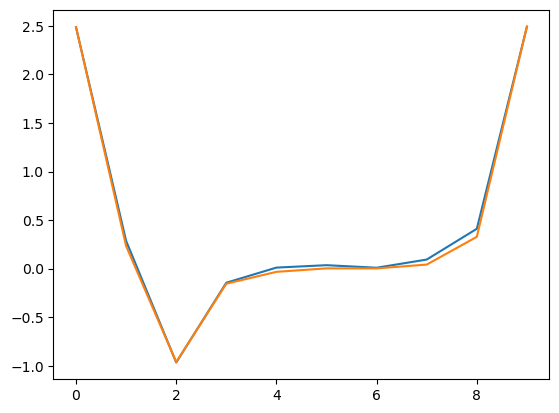

In [7]:
plt.plot(range(10), sum_tensor_bnns/count)
plt.plot(range(10), sum_tensor_maps/count)

tensor([ 0.0132, -0.0778, -0.0930, -0.3629,  0.7952, -0.1987, -0.0024, -0.0216,
        -0.0363, -0.0286], grad_fn=<SliceBackward0>)
tensor([ 0.0091, -0.0662, -0.1286,  0.0800, -0.0594,  0.1027,  0.0093, -0.0008,
        -0.0976,  0.1246], grad_fn=<SliceBackward0>)
tensor([ 0.0171,  0.0196,  0.0512,  0.0513,  0.7758,  0.0618, -0.0263, -0.7201,
        -0.0718, -0.0423], grad_fn=<SliceBackward0>)
tensor([-2.7522e-01,  8.7599e-03,  8.7671e-03, -2.7909e-03, -2.9168e-03,
         8.1086e-04,  1.1081e-02, -3.4106e-02, -2.1471e-01,  1.0012e+00],
       grad_fn=<SliceBackward0>)
tensor([ 0.0459,  0.0456,  0.0215,  0.0088, -0.0403, -0.1765,  1.1043, -0.2062,
        -0.0539, -0.0038], grad_fn=<SliceBackward0>)
tensor([-0.1491,  0.5222, -0.2686,  0.0514,  0.0879,  0.5065,  0.0586,  0.0725,
         0.5652,  0.0009], grad_fn=<SliceBackward0>)
tensor([ 0.0915,  0.2535, -0.0588, -0.3043, -0.1375,  0.1744,  0.2633, -0.1170,
        -0.1010, -0.3141], grad_fn=<SliceBackward0>)
tensor([ 0.0065,  0.24

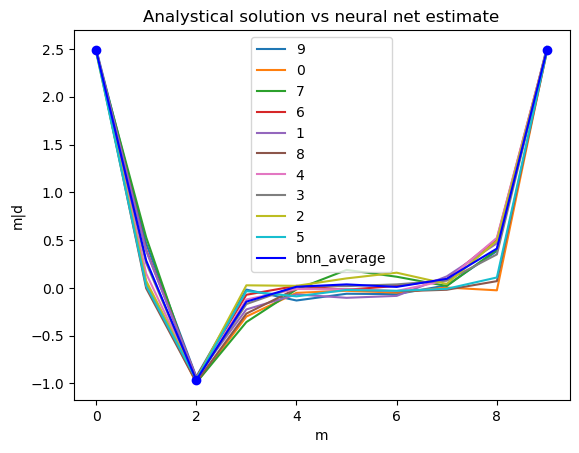

In [8]:
# Getting tensor
n_param = 10
input_tensor = tensor_raw[0]
d = input_tensor[:10]
mask = input_tensor[10:]
location_raw = torch.where(mask > 0.5)
location = location_raw[0]
post_mean, _ = data_generator.get_tensor_posterior(input_tensor)
post_mean2, _ = data_generator2.get_tensor_posterior(input_tensor)

# Plotting model estimates
outer_dir = 'map_vs_bnn_maps'
rootdir = "../saved_models/" + str(outer_dir)
model = Net_mask()
names = []
for subdir, dirs, files in os.walk(rootdir):
    folders = dirs
    count = len(folders)
    break

#plt.plot(range(10), post_mean, 'g')
#plt.plot(range(10), post_mean2, 'r')
sum_tensor_maps = torch.zeros(n_param)
for f in folders: 
    name = '../saved_models/' + str(outer_dir) + '/' + str(f) + '/' + 'model_weights.pth'
    model.load_state_dict(torch.load(name))
    model.eval()
    print(list(model.parameters())[0][0][:10])
    out_raw = model(tensor_raw)
    out = out_raw[0].detach()
    #print(out.size())
    #print(out)
    sum_tensor_maps += out
    #plt.plot(range(10), post_mean)
    #plt.plot(range(10), out)
    #out = out + torch.randn(10)*0.01

    #if f == '0':
    #    plt.plot(range(10), out, 'g')#, 'o')
    #    plt.plot(location, out[location_raw], 'go')
    #else:
    #    plt.plot(range(10), out, '--', alpha=0.5)#, 'o')
    plt.plot(range(10), out, alpha=1)#, 'o')

    #plt.plot(location, out[location_raw], 'o')
    names.append(str(f))
    #print(out)
#plt.plot(range(10), sum_tensor_bnns/count, 'b')
plt.plot(range(10), sum_tensor_bnns/count, 'b')
plt.title("Analystical solution vs neural net estimate")
plt.xlabel("m")
plt.ylabel("m|d")
#plt.legend(['tau1=1000', 'tau1=1', 'default', 'map', 'positive', 'negative', 'average'])
#plt.legend(['tau1=1000', 'tau1=1'])
#plt.plot(location, post_mean[location_raw], 'go')
#plt.plot(location, post_mean2[location_raw], 'ro')
names.append('bnn_average')
plt.plot(location, (sum_tensor_bnns/count)[location_raw], 'bo')
plt.legend(names)
#names.append("Analytical tau2=1000")
#names.append("Analytical tau=1")
#names.append("MAP mean")
#plt.legend(names)
#plt.legend()

tensor([ 0.0091, -0.0662, -0.1286,  0.0800, -0.0594,  0.1027,  0.0093, -0.0008,
        -0.0976,  0.1246], grad_fn=<SliceBackward0>)
tensor([ 0.0171,  0.0196,  0.0512,  0.0513,  0.7758,  0.0618, -0.0263, -0.7201,
        -0.0718, -0.0423], grad_fn=<SliceBackward0>)
tensor([-0.0160,  0.0025,  0.0136,  0.2469, -1.0619,  0.1848,  0.0192, -0.0117,
         0.0164, -0.0098], grad_fn=<SliceBackward0>)


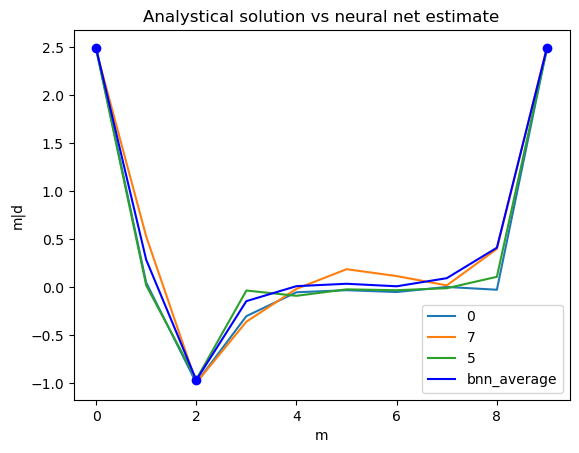

In [9]:
# Getting tensor
n_param = 10
input_tensor = tensor_raw[0]
d = input_tensor[:10]
mask = input_tensor[10:]
location_raw = torch.where(mask > 0.5)
location = location_raw[0]
post_mean, _ = data_generator.get_tensor_posterior(input_tensor)
post_mean2, _ = data_generator2.get_tensor_posterior(input_tensor)

# Plotting model estimates
outer_dir = 'map_vs_bnn_maps'
rootdir = "../saved_models/" + str(outer_dir)
model = Net_mask()
names = []
for subdir, dirs, files in os.walk(rootdir):
    folders = dirs
    count = len(folders)
    break

#plt.plot(range(10), post_mean, 'g')
#plt.plot(range(10), post_mean2, 'r')
sum_tensor_maps = torch.zeros(n_param)
for f in folders: 
    if f == '0' or f == '7' or f == '5':
        name = '../saved_models/' + str(outer_dir) + '/' + str(f) + '/' + 'model_weights.pth'
        model.load_state_dict(torch.load(name))
        model.eval()
        print(list(model.parameters())[0][0][:10])
        out_raw = model(tensor_raw)
        out = out_raw[0].detach()
        #print(out.size())
        #print(out)
        sum_tensor_maps += out
        #plt.plot(range(10), post_mean)
        #plt.plot(range(10), out)
        #out = out + torch.randn(10)*0.01

        #if f == '0':
        #    plt.plot(range(10), out, 'g')#, 'o')
        #    plt.plot(location, out[location_raw], 'go')
        #else:
        #    plt.plot(range(10), out, '--', alpha=0.5)#, 'o')
        plt.plot(range(10), out, alpha=1)#, 'o')

        #plt.plot(location, out[location_raw], 'o')
        names.append(str(f))
    else:
        continue
    #print(out)
#plt.plot(range(10), sum_tensor_bnns/count, 'b')
plt.plot(range(10), sum_tensor_bnns/count, 'b')
plt.title("Analystical solution vs neural net estimate")
plt.xlabel("m")
plt.ylabel("m|d")
#plt.legend(['tau1=1000', 'tau1=1', 'default', 'map', 'positive', 'negative', 'average'])
#plt.legend(['tau1=1000', 'tau1=1'])
#plt.plot(location, post_mean[location_raw], 'go')
#plt.plot(location, post_mean2[location_raw], 'ro')
names.append('bnn_average')
plt.plot(location, (sum_tensor_bnns/count)[location_raw], 'bo')
plt.legend(names)
#names.append("Analytical tau2=1000")
#names.append("Analytical tau=1")
#names.append("MAP mean")
#plt.legend(names)
#plt.legend()